<a href="https://colab.research.google.com/github/Tejaswini-Gsl/neural-networks/blob/main/enhance_architecture_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [58]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [59]:
classes = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

In [60]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [61]:
from tensorflow.keras.utils import to_categorical
num_classes = 10

y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

In [67]:
x_test.shape,y_test_one_hot.shape

((10000, 28, 28, 1), (10000, 10))

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
# from keras.layers.convolutional import Convolution2D
# from keras.layers.convolutional import MaxPooling2D

In [74]:
AlexNet = Sequential()

# Normalize input
AlexNet.add(BatchNormalization(input_shape=(28, 28, 1)))  # MNIST images are 28x28x1

# Convolutional layers
AlexNet.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

AlexNet.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

AlexNet.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
AlexNet.add(BatchNormalization())
AlexNet.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fully connected layers
AlexNet.add(Flatten())
AlexNet.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
AlexNet.add(Dropout(0.3))
AlexNet.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
AlexNet.add(Dropout(0.3))
AlexNet.add(Dense(10, activation='softmax'))  # Output layer with 10 units for MNIST classes

# Compile model
AlexNet.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

AlexNet.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_36 (Ba  (None, 28, 28, 1)         4         
 tchNormalization)                                               
                                                                 
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_37 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 14, 64)        18496     
                                                     

In [75]:
history1 = AlexNet.fit(x_train, y_train_one_hot, batch_size=32, epochs=100, validation_data=(x_test, y_test_one_hot), verbose=1)

Epoch 1/100
1875/1875 [==============================] - 19s 8ms/step - loss: 0.6561 - accuracy: 0.9538 - val_loss: 0.3324 - val_accuracy: 0.9829
Epoch 2/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2894 - accuracy: 0.9781 - val_loss: 0.2398 - val_accuracy: 0.9823
Epoch 3/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2546 - accuracy: 0.9785 - val_loss: 0.2111 - val_accuracy: 0.9869
Epoch 4/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2418 - accuracy: 0.9803 - val_loss: 0.2097 - val_accuracy: 0.9866
Epoch 5/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2229 - accuracy: 0.9818 - val_loss: 0.1871 - val_accuracy: 0.9867
Epoch 6/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2118 - accuracy: 0.9828 - val_loss: 0.1967 - val_accuracy: 0.9838
Epoch 7/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1942 - accuracy: 0.9836 - val_loss: 0.1729 -

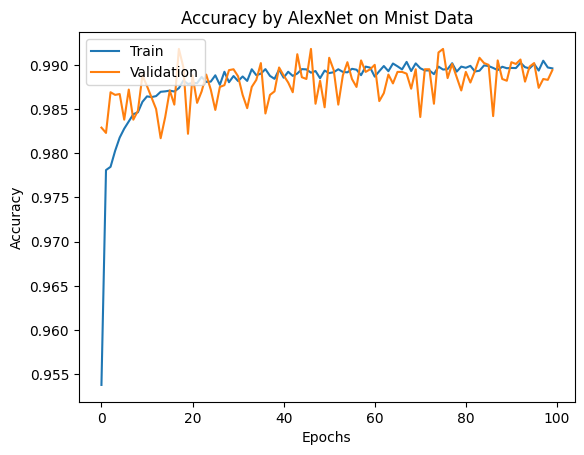

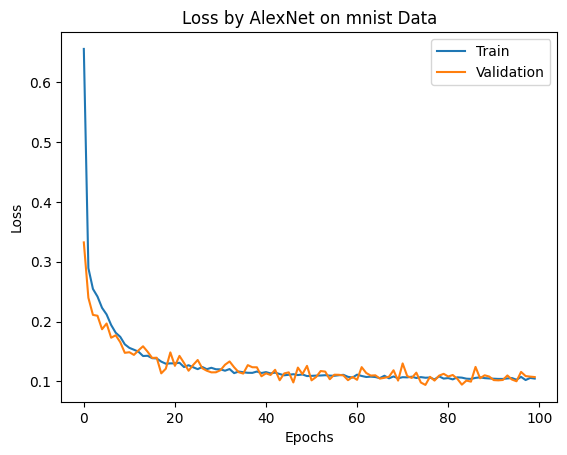

In [77]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy by AlexNet on Mnist Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss by AlexNet on mnist Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [78]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

313/313 [==============================] - 1s 3ms/step


array([[ 976,    0,    1,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1131,    2,    1,    0,    0,    0,    1,    0,    0],
       [   0,    0, 1029,    0,    0,    0,    0,    1,    2,    0],
       [   0,    1,    0, 1003,    0,    4,    0,    1,    1,    0],
       [   0,    1,    3,    0,  960,    0,    2,    0,    4,   12],
       [   1,    1,    0,    4,    0,  879,    1,    1,    3,    2],
       [   4,    4,    1,    0,    0,    0,  949,    0,    0,    0],
       [   1,    7,    9,    0,    0,    0,    0, 1010,    1,    0],
       [   0,    0,    1,    0,    0,    1,    0,    0,  971,    1],
       [   0,    2,    0,    0,    5,    2,    0,    7,    7,  986]])

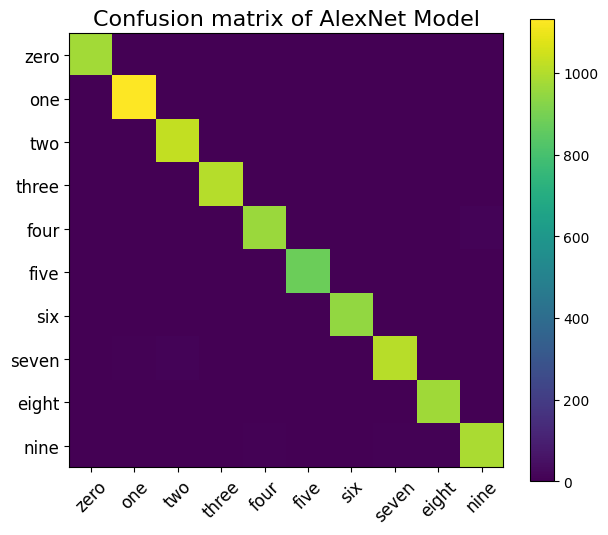

In [79]:
# confusion matrix and accuracy
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [80]:
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions1))

Test accuracy by AlexNet: 0.9894


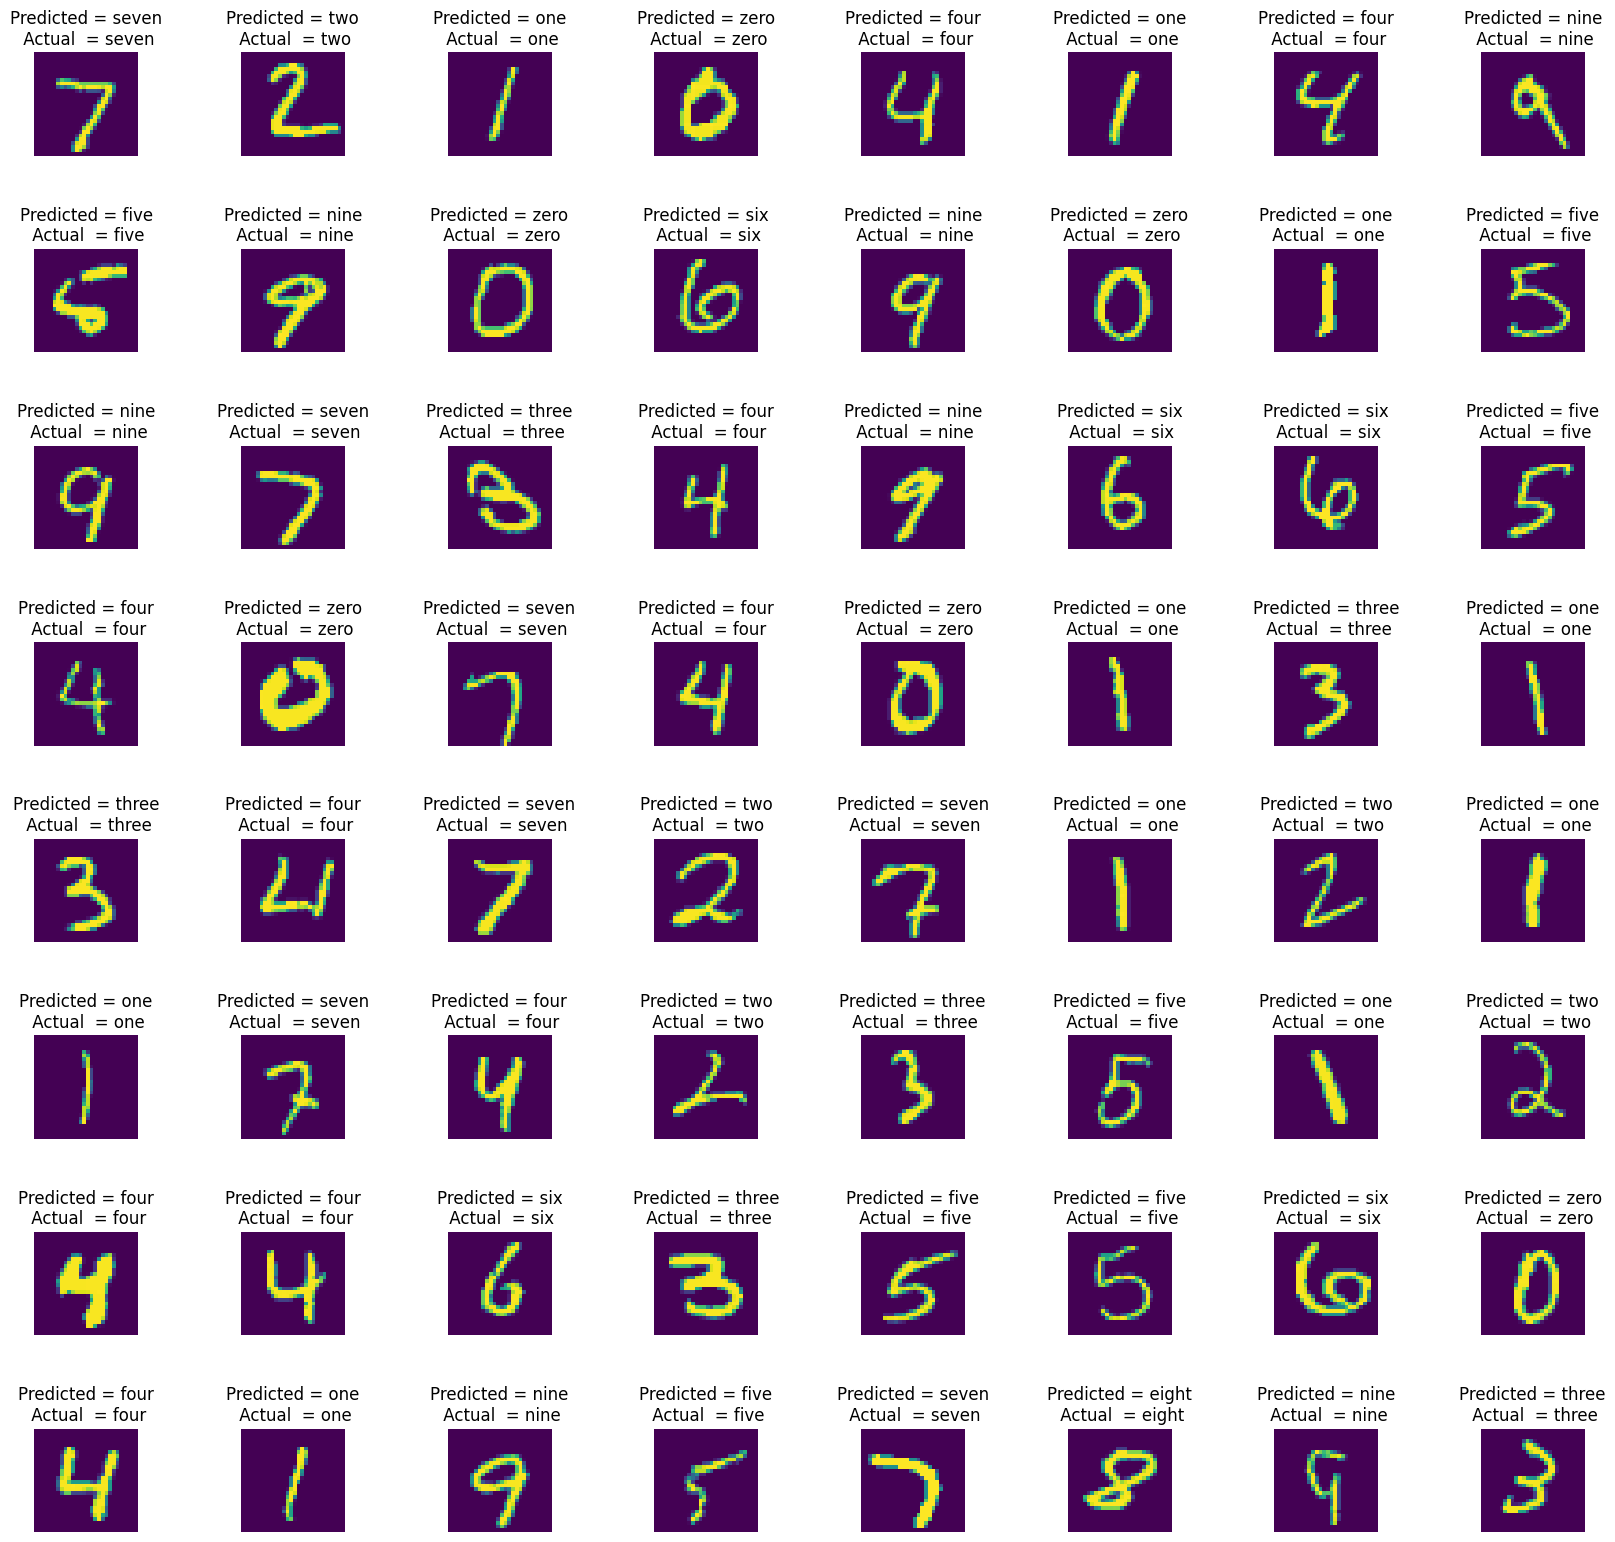

In [81]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions1[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

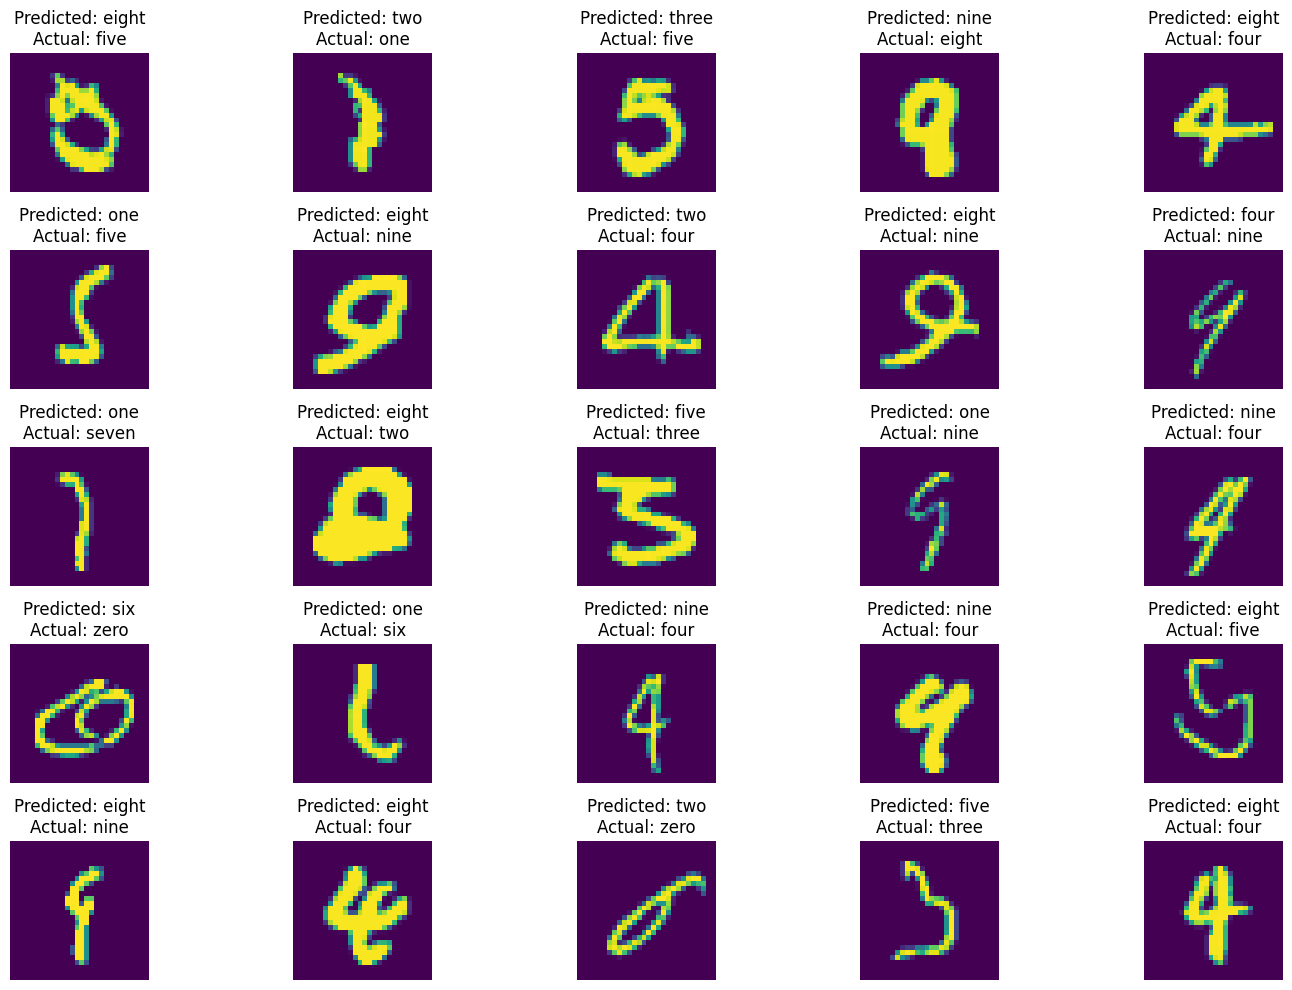

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Get misclassified indices
misclassified_idx = np.where(y_predictions1 != y_test)[0]

# Select a subset of misclassified images
subset_idx = np.random.choice(misclassified_idx, size=25, replace=False)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10))

# Plot misclassified images
for i, idx in enumerate(subset_idx):
    ax = axes.flat[i]
    ax.imshow(x_test[idx])
    ax.set_title(f"Predicted: {classes[y_predictions1[idx]]}\nActual: {classes[y_test[idx]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

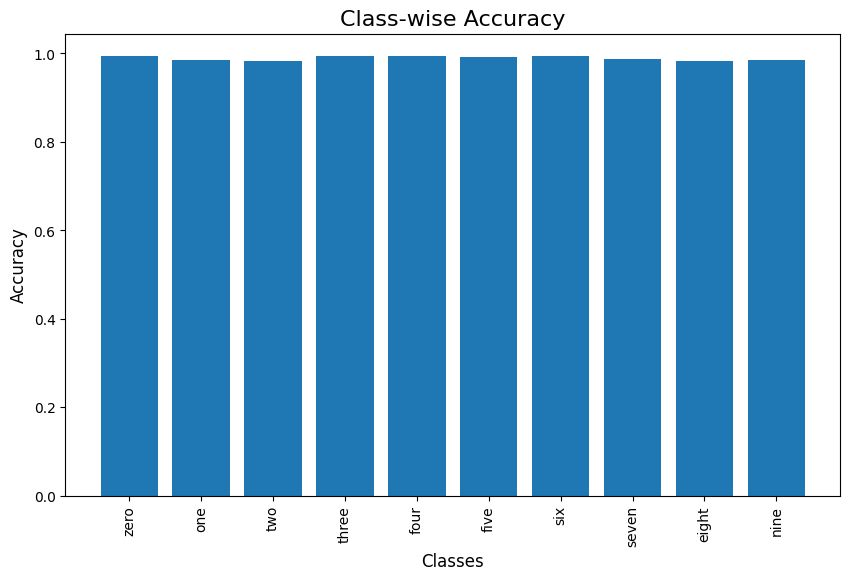

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate class-wise accuracy
class_accuracy = []
for i in range(len(classes)):
    true_positives = confusion_matrix(y_test, y_predictions1)[i, i]
    total_instances = np.sum(confusion_matrix(y_test, y_predictions1)[:, i])
    class_accuracy.append(true_positives / total_instances)

# Plot class-wise accuracy
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(classes, class_accuracy)
ax.set_xlabel('Classes', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Class-wise Accuracy', fontsize=16)
plt.xticks(rotation=90)
plt.show()